In [3]:
# -*- coding: utf-8 -*-
import matplotlib.font_manager as fm
import matplotlib
font_location='/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
#print(font_name)
matplotlib.rc('font', family=font_name)

## import necessary module
import pandas as pd
import numpy as np
import subprocess as sp

#class start
class stock_plotting_tool:
    def __init__(self, directory, plot_keyword):
        self.str_dir=directory
        self.target_search_keyword=plot_keyword
        ##due to null character, excludes the last character
        self.current_directory=sp.check_output('pwd').decode('utf-8')[:-1]
        self.target_file=self.current_directory+self.str_dir
    
    def load_table(self):
        ## input : self
        ## output : table in dataframe type
        #read html file and conver to dataframe
        html=pd.read_html(self.target_file, '총매출액')
        org_dataframe=html[0]
        
        #pick '순매출액' from the table
        table_get=(org_dataframe['구 분']=='순매출액')
        # '순매출액' to '영업이익'
        org_dataframe=org_dataframe[table_get['구 분']]
        return org_dataframe
    
    def refine_loaded_table(self, dataframe):
        #category column extract
        target_name_column_join='부문'
        target_name_first_column=dataframe[target_name_column_join].columns[0]
        target_name_second_column=dataframe[target_name_column_join].columns[1]
        result_name_column_join= target_name_first_column+' - '+ target_name_second_column
        list_category=[]
        dataframe_for_target_column=pd.DataFrame()
        size_indice=dataframe.index.size
        
        for index in range(size_indice):
            string=dataframe[target_name_column_join][target_name_first_column].iloc[index]+' - ' +dataframe[target_name_column_join][target_name_second_column].iloc[index]
            list_category.append(string)
        dataframe_for_target_column[result_name_column_join]=list_category
        #############
        
        ## period column start index get
        index_column=0
        for i in dataframe.columns:
            #print(i)
            if i[0] == '구 분':
                refer_column=index_column
                start_column = refer_column + 1
                break
            index_column=index_column +1
        ##################
        
        ## set creation for storing target periods
        set_periods=set()
        for top_column_cate in dataframe.iloc[:,start_column:]:
            set_periods.add(top_column_cate[0])
        set_periods_sorted=sorted(set_periods, reverse=True)
        ###################
        
        ######## dataframe for info in periods' table
        temp_df=pd.DataFrame()
        for period in set_periods_sorted:
            temp_df[period]=dataframe.iloc[:,start_column:-1][period][self.target_search_keyword]
            #print(temp_df[period])
            temp_df[period]=temp_df[period].replace('-','0')
            temp_df[period]=pd.to_numeric(temp_df[period])
        
        ######################
        
        ## check temp df created
        temp_df.reset_index(inplace=True)
        temp_df=temp_df.drop(columns=['index'])
        #########
        
        ###dataframe merge
        new_df=pd.merge(dataframe_for_target_column,temp_df,how='outer', left_index=True, right_index= True)
        #############
        return new_df
    
    def portion_get(self, dataframe):
        total=dataframe.iloc[:,1:].sum(axis=0)
        new_df=pd.DataFrame()
        firstcolumn=dataframe.columns[0]
        new_df[firstcolumn]=dataframe[firstcolumn]
        for i in dataframe.iloc[:,1:].columns:
            new_df[i]=dataframe[i]/total[i]
        return new_df


In [4]:
# -*- coding: utf-8 -*-

In [5]:
string='/annual_report_2019/10_II.사업의내용.html'

In [6]:
absolute=stock_plotting_tool(string,'금액')
portion=stock_plotting_tool(string,'비중')

In [7]:
absolute.target_file

'/home/se_heon/dart_project/src/annual_report_2019/10_II.사업의내용.html'

In [8]:
dataframe=absolute.load_table()
dataframe_portion=portion.load_table()
dataframe_portion

부문              구 분       제50기              제49기              제48기  \
           부문       부문.1   구 분         금액     비중         금액     비중         금액   
2        CE부문       CE부문  순매출액   42107405  17.3%   44601347  18.6%   44680255   
7        IM부문       IM부문  순매출액  100677677  41.3%  106668318  44.5%  100302112   
12       DS부문        반도체  순매출액   86290962  35.4%   74255595  31.0%   51157002   
17       DS부문         DP  순매출액   32465019  13.3%   34465363  14.4%   26928644   
22       DS부문          계  순매출액  118565559  48.6%  108167480  45.1%   78148203   
27  Harman 부문  Harman 부문  순매출액    8843739   3.6%    7102629   3.0%          -   

           
       비중  
2   22.1%  
7   49.7%  
12  25.3%  
17  13.3%  
22  38.7%  
27      -

In [9]:
result=absolute.refine_loaded_table(dataframe)

In [10]:
result

,부문 - 부문.1,제50기,제49기,제48기
0,CE부문 - CE부문,42107405,44601347,44680255
1,IM부문 - IM부문,100677677,106668318,100302112
2,DS부문 - 반도체,86290962,74255595,51157002
3,DS부문 - DP,32465019,34465363,26928644
4,DS부문 - 계,118565559,108167480,78148203
5,Harman 부문 - Harman 부문,8843739,7102629,0


In [11]:
result.columns.size

4

In [12]:
result.iloc[:,1:].sum(axis=0)

제50기    388950361
제49기    375260732
제48기    301216216
dtype: int64

In [13]:
def portion_get(dataframe):
    total=dataframe.iloc[:,1:].sum(axis=0)
    new_df=pd.DataFrame()
    firstcolumn=dataframe.columns[0]
    new_df[firstcolumn]=dataframe[firstcolumn]
    for i in dataframe.iloc[:,1:].columns:
        new_df[i]=dataframe[i]/total[i]
        
    return new_df
    

In [14]:
result_portion=portion_get(result)

In [15]:
result_portion

,부문 - 부문.1,제50기,제49기,제48기
0,CE부문 - CE부문,0.108259,0.118854,0.148333
1,IM부문 - IM부문,0.258845,0.284251,0.332990
2,DS부문 - 반도체,0.221856,0.197877,0.169835
3,DS부문 - DP,0.083468,0.091844,0.089400
4,DS부문 - 계,0.304835,0.288246,0.259442
5,Harman 부문 - Harman 부문,0.022737,0.018927,0.000000


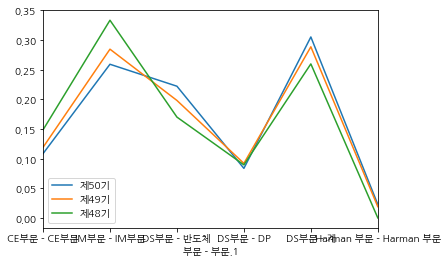

In [17]:
result_portion.plot(x='부문 - 부문.1')